In [49]:
# importing libraries
from sklearn.model_selection import RandomizedSearchCV
from  sklearn.ensemble import  RandomForestClassifier
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
#reading data and checking missing data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train.columns = train.columns.str.strip()

In [51]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<AxesSubplot:xlabel='Age'>

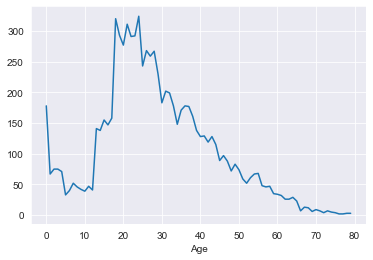

In [52]:
# age column distribution check
sns.set_style(rc={'figure.figsize':(10,8)})
train.groupby('Age').PassengerId.nunique().plot()

In [53]:
# check how many passengers we have
train.PassengerId.nunique()

8693

In [54]:
# convert string and bool data to int and dropping unnecessary columns
test=pd.get_dummies(data=test,columns=['HomePlanet','CryoSleep','VIP'])
test=test.drop(['Cabin','Destination','Name','FoodCourt','RoomService','ShoppingMall','Spa','VRDeck'],axis=1)
train=pd.get_dummies(data=train,columns=['HomePlanet','CryoSleep','VIP','Transported'])
train=train.drop(['Cabin','Destination','Name','FoodCourt','RoomService','ShoppingMall','Spa','VRDeck'],axis=1)

In [55]:
train.head()

,PassengerId,Age,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True
0,0001_01,39.0,0,1,0,1,0,1,0,1,0
1,0002_01,24.0,1,0,0,1,0,1,0,0,1
2,0003_01,58.0,0,1,0,1,0,0,1,1,0
3,0003_02,33.0,0,1,0,1,0,1,0,1,0
4,0004_01,16.0,1,0,0,1,0,1,0,0,1


array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

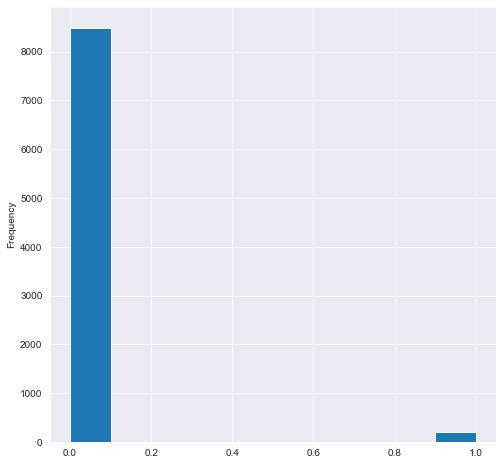

In [56]:
# VIP column distribution check
train['VIP_True'].plot(kind='hist',subplots=True, figsize=(8, 8))

In [57]:
#filling  the missing age values by its median value
median_train_age=train.Age.median()
median_test_age=test.Age.median()
train=train.fillna({'Age':median_train_age})
test=test.fillna({'Age':median_test_age})

In [58]:
#formation of train and test samples
X_train=train.drop(['Transported_False','Transported_True'],axis=1)
X_test=test
y_train=train[['Transported_False']]

In [59]:
# creating random forest with the best parametrs and prediction y_test data
parameters={'criterion':['gini','entropy'],'max_depth':range(1,71,5),'min_samples_leaf':range(1,51,5),'min_samples_split':range(1,101,10)}
forest=RandomForestClassifier()
random_classifier=RandomizedSearchCV(forest,parameters,cv=5)
random_classifier.fit(X_train,y_train)
forest=random_classifier.best_estimator_
prediction=forest.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [60]:
#variable prediction processing
prediction=pd.DataFrame(data=prediction,columns=['Transported_False'])
pass_id=X_test.PassengerId
prediction=prediction.join(pass_id)
prediction=prediction.reindex(columns=['PassengerId','Transported_False'])